Jason Pettinato HW 1
I joined the class late, so I hope I do not lose any credit

# Q1
Suppose there is a jar with two coins in it. **Coin A comes up heads 75%** of the time. **Coin B comes up heads 50% of the time**. Say one of the coins is picked at random (with equal probability) and flipped, with the result of heads. What is the probability that the coin was coin A? Calculate by hand, using math. Show your work.

### Solution
Given information:
$$p(h|A)=0.75$$
$$p(h|B)=0.5$$
$$p(A)=0.5$$
$$p(B)=0.5$$
Where $$p(A)+p(B)=1$$

Find:
$$p(A│h)$$

Bayes Theorem:

$$p(A|B)=\frac{p(B|A)P(A)}{P(B)}$$


Thus

$$p(A│h)=\frac{p(h|A)⋅p(A)}{p(h)}$$

Next we find$$p(h)$$

Using $$p(h)=p(h|A)\cdot p(A) + p(h|B) \cdot p(B) = 0.75*0.5 + 0.5*0.5 = 0.625$$

Finally, plugging into Bayes:

$$p(A│h)=\frac{p(h|A)⋅p(A)}{p(h)} = \frac{0.75 \times 0.5}{0.625}=0.6$$

# Q2
Write Pangolin code to calculate the answer to the previous question. Include in your report the code as well as the calculated probability. Do not use any other packages other than pangolin.

"Suppose there is a jar with two coins in it. **Coin A comes up heads 75%** of the time. **Coin B comes up heads 50% of the time**. Say one of the coins is picked at random (with equal probability) and flipped, with the result of heads. What is the probability that the coin was coin A?."
### Solution

In [25]:
import pangolin as pg 

# Proabaility of choosing A or B
coinAB = pg.bernoulli(0.5)


# Probabiliy of heads for A and B, respectively
HeadsAB = pg.makerv([0.75,0.5])

# We link the chance of getting A,B to the probability of getting heads from either
coin = HeadsAB[coinAB]

# We create a new variable "flip" which gives us the combined probability between A,B and heads,tails
flip = pg.bernoulli(coin)

# p(A) is the expectation of getting tails from a random coin. 
pA = pg.E(coinAB, flip,1) # let 1 --> heads

# Since pA is the probability of tails (for some reason...), the opposite (1-p) should give us p(heads)
print(1-pA)


0.5999


# Q3
Suppose there is a jar with two coins in it. Coin A comes up heads 75% of the time. Coin B comes up heads 50% of the time. Say one of the coins is picked at random (with equal probability) and flipped 5 times with the result of (HEADS, HEADS, HEADS, TAILS, HEADS). What is the probability that the coin was coin A? Calculate by hand, using math. Show your work.

### Solution
We know
$$ p(h|A)=0.75 \ , \ p(b|B) = 0.5$$

Given that $$p(A)=p(B)=0.5$$ We **want to find** out $$p(A|information)$$ Where the information is that 5 subsequent flips were HHHTH
let us call this information $\theta$

Using bayes thm: $$p(A|\theta)=\frac{p(\theta|A)p(A)}{p(\theta)}$$

And so, we need to find out $p(\theta|A) \  ,  \ p(\theta)$

$$p(\theta)=p(\theta|A)*p(A) + p(\theta|B)*p(B)$$

So we must find 

$$p(\theta|A) \ , \ p(\theta|B)$$

The probability that the coin comes up HHHTH for A is:
$$p(\theta|A)=0.75^4 * 0.25=0.079$$

Similarly for B:
$$p(\theta|B)=0.5^5 = 0.031$$

So we can compute 
$$p(\theta)=p(\theta|A)*p(A) + p(\theta|B)*p(B) = 0.079 * 0.5 +  0.031 * 0.5 = 0.055$$

Finally
$$p(A|\theta)=\frac{p(\theta|A)p(A)}{p(\theta)} = 0.718 $$

## Q4
Using Pangolin\
Suppose there is a jar with two coins in it. Coin A comes up heads 75% of the time. Coin B comes up heads 50% of the time. Say one of the coins is picked at random (with equal probability) and flipped 5 times with the result of (HEADS, HEADS, HEADS, TAILS, HEADS). What is the probability that the coin was coin A? 

### Solution

In [27]:
import pangolin as pg

# Proabaility of choosing A or B
coinAB = pg.bernoulli(0.5)


# Probabiliy of heads for A and B, respectively
HeadsAB = pg.makerv([0.75,0.5])

# Link the distribution to the random variables
coin = HeadsAB[coinAB]

# Given
n_flips = 5

# In hindsight, this could be done with pg.Loop()
# Getting 5 random variables since each is idd
flips = [pg.bernoulli(coin) for _ in range(n_flips)]
# pg.print_upstream(flips)

# Use expectation given the data to find p(tails) --> not sure how to directly calculate p(heads)
pA = pg.E(coinAB, flips,[1,1,1,0,1])

# p(heads) = 1-p(tails) ---> p(heads) + p(tails) == 1
# not sure how to just get p(heads) from pg.E...
print(1-pA)




0.7167


## Q5
One day, you find a fancy-looking sculpture outside your house. Doing some searching online, you figure that it is an AwesomeSculture, made by AwesomeCo™️. But AwesomeCo seems to make 5 different models, each with different weights. The AwesomeMark1 weighs 1 kg. The AwesomeMark2 weights 2 kg, etc., until the AwesomeMark5 that weighs 5 kg. You want to know which one you have.

Your sculpture seems to resemble all 5 models equally, and they seem to be equally common. So you assume a uniform prior distribution that each sculpture is equally likely.

Now, you have a scale. It is unbiased, but noisy. Whatever the true weight is, the scale returns a noisy measurement that is correct on average but has noise. The noise is sampled from a standard Gaussian distribution (mean 0, standard deviation 1).

So you put the sculpture on the scale, and you measure 2.9 kg. What is the probability that you have a AwesomeMark1, AwesomeMark2, AwesomeMark3, AwesomeMark4, or AwesomeMark5?
Write a short Python program to calculate the answer. In this program, you may use the function scipy.stats.norm.pdf but no other imports. In addition to your program, give the final probabilities as a list of five positive numbers that sum to one.

### Solution
We find an object from company
There are 5 different models of object from company each with weights (1,2,3,4,5)
Assume *uniform prior distribution* for each sculpture type
We **measure** on an *unbiased, but noisy scale* 
The noise is sampled from \
$N(0,1)$ 

We measure 2.9 kg, find the probability that our sample is from each of the five models (1,2,3,4,5)
Show the sum of the probabilities, and that they add up to one

In [ ]:
from scipy.stats import norm



# Ground truth
weights = [1, 2, 3, 4, 5]

# Observation
measurement = 2.9

# Calculate likelihoods
# We shift the distribution along our weights
likelihoods = [norm.pdf(measurement, loc=w, scale=1) for w in weights]

# Calculate total likelihood to get probability
total_likelihood = sum(likelihoods)

# Calculate and print probabilities
probabilities = []
# Loop over each model, and designate our posterior probability
for i, likelihood in enumerate(likelihoods, 1):
    probability = likelihood / total_likelihood
    probabilities.append(probability)
    print(f"AwesomeMark{i}: {probability:.4f}")

print("\nSum of all probabilities:")
print(sum(probabilities))


AwesomeMark1: 0.0662
AwesomeMark2: 0.2686
AwesomeMark3: 0.4008
AwesomeMark4: 0.2199
AwesomeMark5: 0.0444

Sum of all probabilities:
1.0


Q6
Write Pangolin code to calculate the answer to the previous question. Include in your report the code as well as the calculated probabilities. (You may need to do a little post-processing to calculate your answer)

In [28]:
import pangolin as pg

# Define the weights (models) and a uniform prior model
weights = pg.makerv([1, 2, 3, 4, 5])  # Weights of the 5 models
prior_model = pg.categorical([1/5] * 5)  # Uniform prior for the 5 models
statue = 2.9  # Observed weight

true_weight = weights[prior_model]

observed_weight = pg.normal(true_weight, 1)

# Posterior samples
samples = pg.sample(prior_model, observed_weight, statue, niter=10000)

# List comprehension + dict for fun
posterior_probs = {i + 1: sum(samples == i) / len(samples) for i in range(len(weights))}

print("Posterior probabilities:", posterior_probs)
print(f"The probabilities all add up to one: {sum(posterior_probs.values())}")

 

Posterior probabilities: {1: Array(0.0688, dtype=float32, weak_type=True), 2: Array(0.2688, dtype=float32, weak_type=True), 3: Array(0.3987, dtype=float32, weak_type=True), 4: Array(0.2184, dtype=float32, weak_type=True), 5: Array(0.0453, dtype=float32, weak_type=True)}
The probabilities all add up to one: 1.0


Q7
Now, say you do 3 more measurements, so you have a total of 4 (including the previous ones). Your measurements are: 2.9, 4.2, 3.5, 2.5.
Now, what is the probability you have AwesomeMark1? What about AwesomeMark2? AwesomeMark3? AwesomeMark4? AwesomeMark5?
Write a short Python program to calculate the answer. In this program, you may use the function scipy.stats.norm.pdf and math.prod but no other imports. In addition to your program, give the final probabilities as a list of five positive numbers that sum to one.

In [2]:
from scipy.stats import norm
from math import prod

likelihoods = []

# Ground truth
weights = [1, 2, 3, 4, 5]

# Observation
measurements = [2.9, 4.2, 3.5, 2.5]

# Calculate likelihoods
# We shift the distribution along our weights
for w in weights:
    likelihood_per_weight = [norm.pdf(measurement, loc=w, scale=1) for measurement in measurements]
    # Multiply the individual likelihoods together to get the joint likelihood
    joint_likelihood = prod(likelihood_per_weight)
    likelihoods.append(joint_likelihood)

# Normalize the likelihoods to sum to 1 (posterior probabilities)
total_likelihood = sum(likelihoods)
probabilities = [likelihood / total_likelihood for likelihood in likelihoods]

# Print the final probabilities for each model
for i, probability in enumerate(probabilities, 1):
    print(f"AwesomeMark{i}: {probability:.4f}")

# Ensure that the probabilities sum to 1
print("\nSum of all probabilities:", sum(probabilities))

AwesomeMark1: 0.0000
AwesomeMark2: 0.0310
AwesomeMark3: 0.6874
AwesomeMark4: 0.2795
AwesomeMark5: 0.0021

Sum of all probabilities: 0.9999999999999999


Q8
Write Pangolin code to calculate the answer in the previous question. Include in your report your code as well as the calculated probabilities.

In [30]:
import pangolin as pg

# Define the weights (models) and uniform prior
weights = pg.makerv([1, 2, 3, 4, 5])  # 5 possible weights corresponding to models
prior_model = pg.categorical([1/5] * 5)  # Uniform prior over the models
statue_measurements = [2.9, 4.2, 3.5, 2.5]  # Multiple measurements

# The true weight depends on the selected model
true_weight = weights[prior_model]

# Define likelihoods for each measurement
likelihoods = [pg.normal(true_weight, 1) for _ in statue_measurements]

# Perform sampling from the posterior distribution
samples = pg.sample([prior_model], likelihoods, statue_measurements, niter=10000)

# Convert the samples into a list and calculate the posterior probabilities
samples_list = samples[0]  # Extract samples for the prior model
posterior_probs = {i + 1: (samples_list == i).sum() / len(samples_list) for i in range(len(weights))}

# Print posterior probabilities for each model
print("Posterior probabilities:", posterior_probs)


Posterior probabilities: {1: Array(0., dtype=float32), 2: Array(0.0322, dtype=float32), 3: Array(0.6853, dtype=float32), 4: Array(0.2805, dtype=float32), 5: Array(0.002, dtype=float32)}


Q9
Wait, no! Looking closer, you realize your sculpture isn't made by AwesomeCo, it's made by MegaCo™️. MegaCo is so awesome that it doesn't even have model numbers. When someone buys a sculpture from MegaCo, a weight is randomly chosen uniformly from all weights between 1 kg and 5 kg. (For example, one person might get a 2.73246452327 kg sculpture, another a 4.21138524 kg one.)
Write Pangolin code to sample from the posterior over all possible weights of your model given all four previous observations (2.9, 4.2, 3.5, 2.5). Draw samples from the posterior and make a plot of the samples.
(Hint: Use the density=True and bins=100 when calling matplotlib.pyplot.hist.)

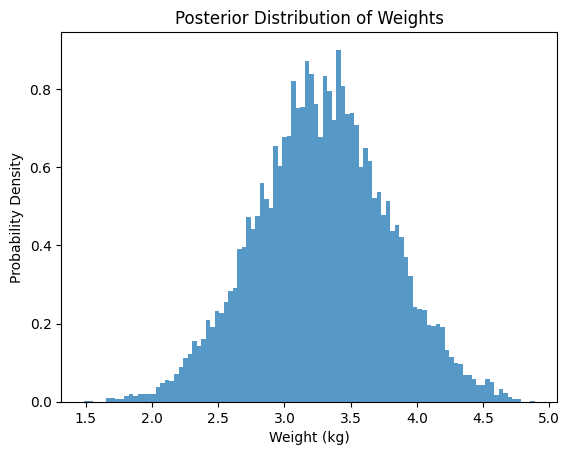

In [32]:
import pangolin as pg
import matplotlib.pyplot as plt

# Givens, distribution definitions
weights = pg.uniform(1, 5)  # Prior
statue_measurements = [2.9, 4.2, 3.5, 2.5]  # Multiple measurements

# Likelihood
likelihoods = [pg.normal(weights, 1) for _ in statue_measurements]

# Posterior
samples = pg.sample([weights], likelihoods, statue_measurements, niter=10000)

# Get our data from the sampling
weight_samples = samples[0]

# Plotting our bayesian results
plt.hist(weight_samples, bins=100, density=True, alpha=0.75)
plt.xlabel('Weight (kg)')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution of Weights')
plt.show()